In [1]:
from astropy.table import Table, Column
from astropy.time import Time
import astropy.units as u
import bottleneck as bn
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
import numpy as np

In [2]:
from my_progs.vlbi.read_sou import read_sou
from my_progs.catalog.pos_diff import radio_cat_diff_calc

ifix_sou = read_sou("../data/icrf250-fix/icrf250-fix.sou")
gfix_sou = read_sou("../data/gcrf-a1u-fix/gcrf-a1u-fix.sou")

# Calculate the positional difference
gsouoft = radio_cat_diff_calc(gfix_sou, ifix_sou, sou_name="iers_name")

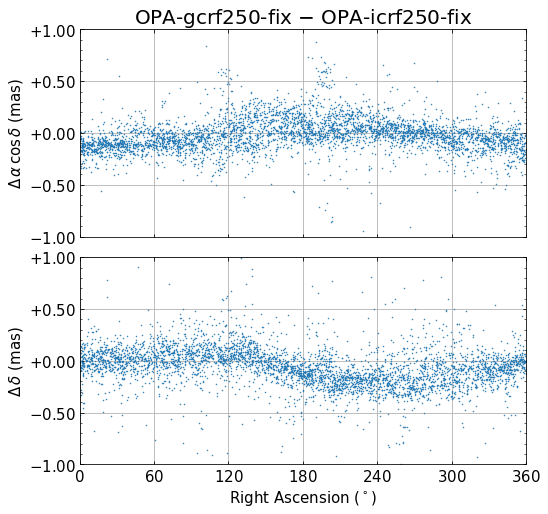

In [3]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(gsouoft["ra"], gsouoft["dra"], ".", ms=1)
ax1.plot(gsouoft["ra"], gsouoft["ddec"], ".", ms=1)

ax0.set_ylabel("$\Delta\,\\alpha\,\cos\,\delta$ (mas)", fontsize=15)

ax1.set_xlabel("Right Ascension ($^\circ$)", fontsize=15)
ax1.set_ylabel("$\Delta\,\delta$ (mas)", fontsize=15)

# limit of axis
ax0.set_xlim([0, 360])
ax0.set_ylim([-1, 1])
ax1.set_ylim([-1, 1])

# Ticks and labels
ytick = np.arange(-1, 1.1, 0.5)
ax0.set_yticks(ytick)
ax0.set_yticklabels(["${:+.2f}$".format(yi) for yi in ytick],
                   fontsize=15)
ax1.set_yticks(ytick)
ax1.set_yticklabels(["${:+.2f}$".format(yi) for yi in ytick],
                   fontsize=15)

xtick = np.arange(0, 361, 60)
ax1.set_xticks(xtick)
ax1.set_xticklabels(["${:d}$".format(xi) for xi in xtick],
                   fontsize=15)
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

# Minor tickers
ax0.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))

ax0.set_title("OPA-gcrf250-fix $-$ OPA-icrf250-fix", fontsize=20)
ax0.grid()
ax1.grid()

plt.subplots_adjust(hspace=0.1)
plt.savefig("../plots/gcrf250fix-sou-diff-on-ra.png")

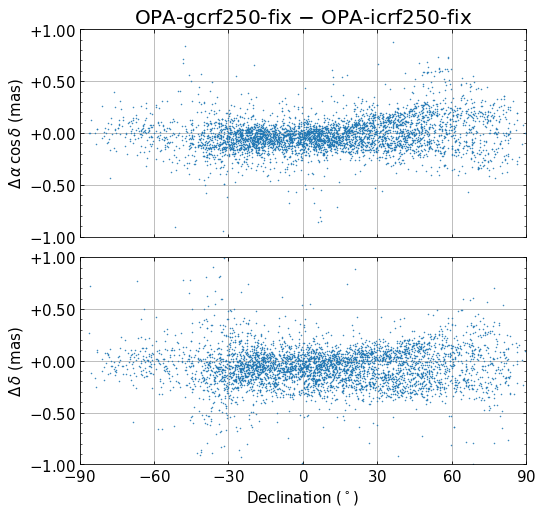

In [4]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(gsouoft["dec"], gsouoft["dra"], ".", ms=1)
ax1.plot(gsouoft["dec"], gsouoft["ddec"], ".", ms=1)

ax0.set_ylabel("$\Delta\,\\alpha\,\cos\,\delta$ (mas)", fontsize=15)
ax1.set_xlabel("Declination ($^\circ$)", fontsize=15)
ax1.set_ylabel("$\Delta\,\delta$ (mas)", fontsize=15)

# limit of axis
ax0.set_xlim([-90, 90])
ax0.set_ylim([-1, 1])
ax1.set_ylim([-1, 1])

# Ticks and labels
ytick = np.arange(-1, 1.1, 0.5)
ax0.set_yticks(ytick)
ax0.set_yticklabels(["${:+.2f}$".format(yi) for yi in ytick],
                   fontsize=15)
ax1.set_yticks(ytick)
ax1.set_yticklabels(["${:+.2f}$".format(yi) for yi in ytick],
                   fontsize=15)

xtick = np.arange(-90, 91, 30)
ax1.set_xticks(xtick)
ax1.set_xticklabels(["${:d}$".format(xi) for xi in xtick],
                   fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

# Minor tickers
ax0.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))

# Title
ax0.set_title("OPA-gcrf250-fix $-$ OPA-icrf250-fix", fontsize=20)
ax0.grid()
ax1.grid()

plt.subplots_adjust(hspace=0.1)
plt.savefig("../plots/gcrf250fix-sou-diff-on-dec.png")

In [5]:
# My modules
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting

# Transform columns into np.array
dra = np.array(gsouoft["dra"])
ddec = np.array(gsouoft["ddec"])
dra_err = np.array(gsouoft["dra_err"])
ddec_err = np.array(gsouoft["ddec_err"])
ra_rad = np.array(gsouoft["ra"].to(u.radian))
dec_rad = np.array(gsouoft["dec"].to(u.radian))
dra_ddec_cov = np.array(gsouoft["dra_ddec_cov"])

# Transformation parameters
par1, sig1, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    elim_flag="None")

# mas -> uas
par1 = par1 * 1.e3
sig1 = sig1 * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size,
       par1[3], sig1[3], par1[4], sig1[4], par1[5], sig1[5],
       par1[0], sig1[0], par1[1], sig1[1], par1[2], sig1[2]))


print(dra.size,
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f"
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f" % 
      (par1[3], sig1[3], par1[4], sig1[4], par1[5], sig1[5],
       par1[0], sig1[0], par1[1], sig1[1], par1[2], sig1[2]))

Estimates (  4356 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
        +148 +/-   1   -87 +/-   1   -17 +/-   1         +86 +/-   1  -104 +/-   1   -95 +/-   1
--------------------------------------------------------------------------------------------

4356  +148   1   -87   1   -17   1  +86   1  -104   1   -95   1


In [6]:
from my_progs.vlbi.read_eop import read_eob
from my_progs.vlbi.comp_eop import calc_eop_offset

ifix_eob = read_eob("../data/icrf250-fix/icrf250-fix.eob")
gfix_eob = read_eob("../data/gcrf-a1u-fix/gcrf-a1u-fix.eob")

geoboft = calc_eop_offset(gfix_eob, ifix_eob, "../logs/gcrf-a1u_minus-fix_offset.dat")

# Create a Time object for epochs of EOP
geoboft.sort("epoch_pmr")

# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(geoboft["epoch_pmr"], format="mjd")

nutEpoch = Time(geoboft["epoch_nut"], format="mjd")

There are 6633 and 6633 points in series 1 and series 2, respectively,between which 6633 are common.
Save the EOP offset series in ../logs/gcrf-a1u_minus-fix_offset.dat


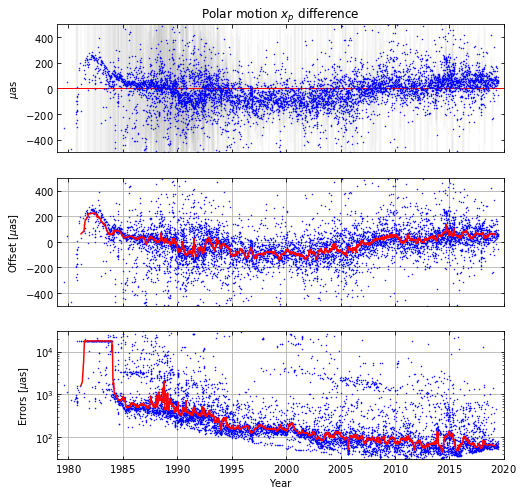

In [7]:
# Polar motion xp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (8, 8), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            geoboft["dxp"],
            yerr = geoboft["dxp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, geoboft["dxp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dxpmed = bn.move_median(geoboft["dxp"], window=50)
ax1.plot(epomed, dxpmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, geoboft["dxp_err"], "b.", ms = 1)
dxperrmed = bn.move_median(geoboft["dxp_err"], window=50)
ax2.plot(epomed, dxperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
# ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -500, 500])
ax1.set_ylim([-500, 500])
ax2.set_ylim([30, 30000])

# Titles and Labels
ax0.set_title("Polar motion $x_p$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

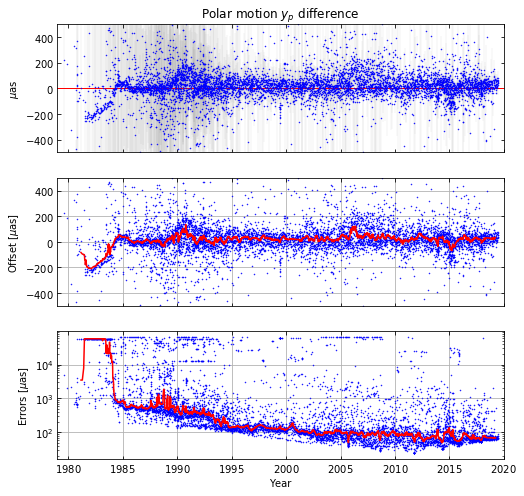

In [8]:
# Polar motion yp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (8, 8), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            geoboft["dyp"],
            yerr = geoboft["dyp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, geoboft["dyp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dypmed = bn.move_median(geoboft["dyp"], window=50)
ax1.plot(epomed, dypmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, geoboft["dyp_err"], "b.", ms = 1)
dyperrmed = bn.move_median(geoboft["dyp_err"], window=50)
ax2.plot(epomed, dyperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -500, 500])
ax1.set_ylim([-500, 500])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("Polar motion $y_p$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

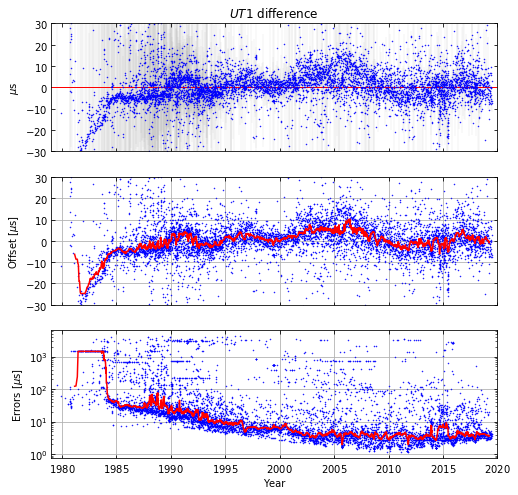

In [9]:
# UT1
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (8, 8), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            geoboft["dut"],
            yerr = geoboft["dut_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, geoboft["dut"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dutmed = bn.move_median(geoboft["dut"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, geoboft["dut_err"], "b.", ms = 1)
duterrmed = bn.move_median(geoboft["dut_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -30, 30])
ax1.set_ylim([-30, 30])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("$UT1$ difference")
ax0.set_ylabel("$\mu$s")
ax1.set_ylabel("Offset [$\mu$s]")
ax2.set_ylabel("Errors [$\mu$s]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

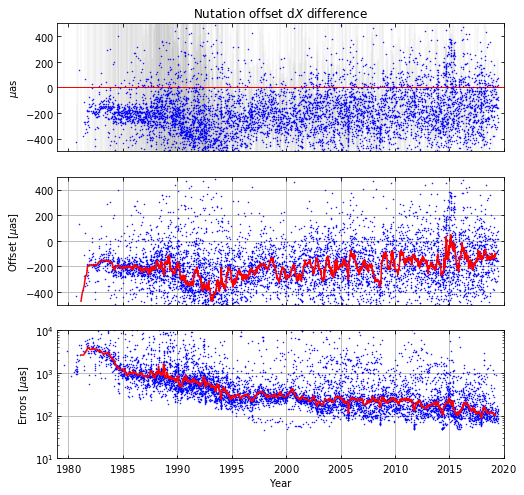

In [10]:
# Nutation offset dX
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (8, 8), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            geoboft["ddX"],
            yerr = geoboft["ddX_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, geoboft["ddX"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(geoboft["ddX"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, geoboft["ddX_err"], "b.", ms = 1)
duterrmed = bn.move_median(geoboft["ddX_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -500, 500])
ax1.set_ylim([-500, 500])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$X$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

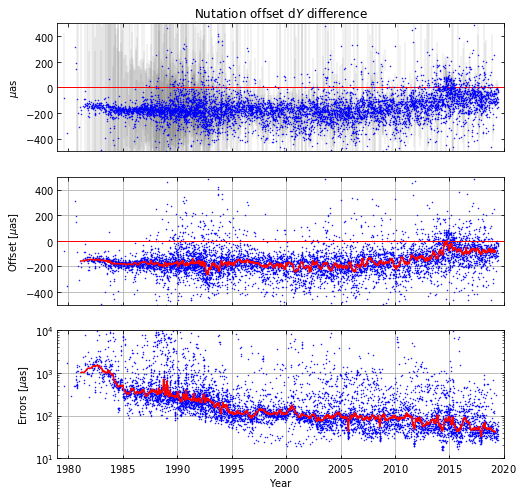

In [11]:
# Nutation offset dY
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (8, 8), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            geoboft["ddY"],
            yerr = geoboft["ddY_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.1,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, geoboft["ddY"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(geoboft["ddY"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, geoboft["ddY_err"], "b.", ms = 1)
duterrmed = bn.move_median(geoboft["ddY_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -500, 500])
ax1.set_ylim([-500, 500])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$Y$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

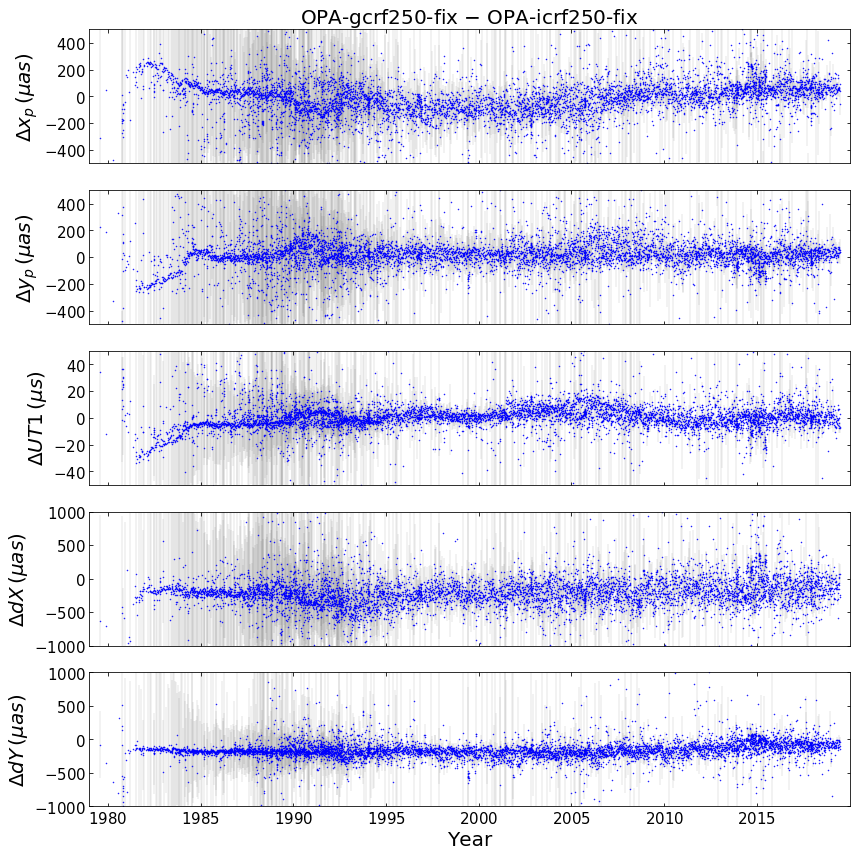

In [23]:
# EOP difference
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(figsize=(12, 12), sharex=True, nrows=5)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear, geoboft["dxp"], yerr=geoboft["dxp_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(pmrEpoch.jyear, geoboft["dyp"], yerr=geoboft["dyp_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax2.errorbar(pmrEpoch.jyear, geoboft["dut"], yerr=geoboft["dut_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax3.errorbar(nutEpoch.jyear, geoboft["ddX"], yerr=geoboft["ddX_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax4.errorbar(nutEpoch.jyear, geoboft["ddY"], yerr=geoboft["ddY_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# # Moving median
# pmrepomed = bn.move_median(pmrEpoch.jyear, window=50)
# dxpmed = bn.move_median(geoboft["dxp"], window=50)
# dypmed = bn.move_median(geoboft["dyp"], window=50)
# dutmed = bn.move_median(geoboft["dut"], window=50)
# ax0.plot(pmrepomed, dxpmed, "r")
# ax1.plot(pmrepomed, dypmed, "r")
# ax2.plot(pmrepomed, dutmed, "r")

# nutepomed = bn.move_median(nutEpoch.jyear, window=50)
# ddxmed = bn.move_median(geoboft["ddX"], window=50)
# ddymed = bn.move_median(geoboft["ddY"], window=50)
# ax3.plot(nutepomed, ddxmed, "r")
# ax4.plot(nutepomed, ddymed, "r")

# Limits
ax0.axis([1979, 2020, -500, 500])
ax1.set_ylim([-500, 500])
ax2.set_ylim([-50, 50])
ax3.set_ylim([-1000, 1000])
ax4.set_ylim([-1000, 1000])

# Ticks and labels
xtick = np.arange(1980, 2020, 5)
ax4.set_xticks(xtick)
ax4.set_xticklabels(["${:d}$".format(xi) for xi in xtick],
                   fontsize=15)

ytick1 = np.arange(-400, 500, 200)
ax0.set_yticks(ytick1)
ax0.set_yticklabels(["${:.0f}$".format(yi) for yi in ytick1],
                   fontsize=15)
ax1.set_yticks(ytick1)
ax1.set_yticklabels(["${:.0f}$".format(yi) for yi in ytick1],
                   fontsize=15)

ytick2 = np.arange(-40, 50, 20)
ax2.set_yticks(ytick2)
ax2.set_yticklabels(["${:.0f}$".format(yi) for yi in ytick2],
                   fontsize=15)

ytick3 = np.arange(-1000, 1001, 500)
ax3.set_yticks(ytick3)
ax3.set_yticklabels(["${:.0f}$".format(yi) for yi in ytick3],
                   fontsize=15)
ax4.set_yticks(ytick3)
ax4.set_yticklabels(["${:.0f}$".format(yi) for yi in ytick3],
                   fontsize=15)

# Titles and Labels
ax0.set_title("OPA-gcrf250-fix $-$ OPA-icrf250-fix", fontsize=20)
ax0.set_ylabel("$\Delta x_p\,(\mu as)$", fontsize=20)
ax1.set_ylabel("$\Delta y_p\,(\mu as)$", fontsize=20)
ax2.set_ylabel("$\Delta UT1\,(\mu s)$", fontsize=20)
ax3.set_ylabel("$\Delta dX\,(\mu as)$", fontsize=20)
ax4.set_ylabel("$\Delta dY\,(\mu as)$", fontsize=20)
ax4.set_xlabel("Year", fontsize=20)

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax3.xaxis.set_ticks_position("both")
ax3.yaxis.set_ticks_position("both")

ax4.xaxis.set_ticks_position("both")
ax4.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()

plt.savefig("../plots/gcrf250fix-eop-diff.png")
plt.savefig("../plots/gcrf250fix-eop-diff.eps")

## Difference in the station position and velocity

No significant difference and global sysmatics was found.

In [13]:
from my_progs.vlbi.read_trf import read_trf
from my_progs.vlbi.comp_trf import calc_trf_offset

# Station position and velocity
gfretrf = read_trf("../data/gcrf-a1u-fix/gcrf-a1u-fix")
gfixtrf = read_trf("../data/icrf250-fix/icrf250-fix")

# Calculate the station position differences
gtrfoft = calc_trf_offset(gfretrf,  gfixtrf)

There are 188 and 188 stations in two sets, respectively, between which 188 are common.


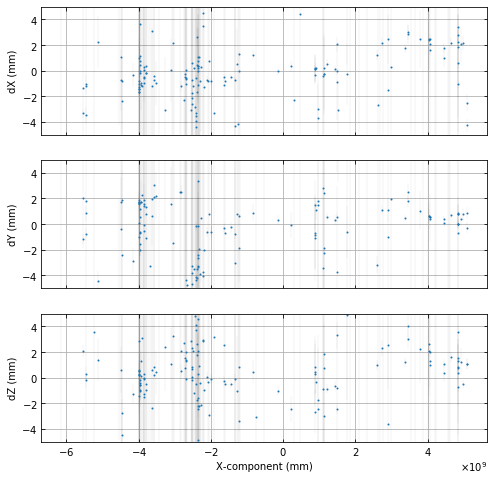

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)

ax0.errorbar(gtrfoft["xp"], gtrfoft["dxp"], fmt=".", ms=2,
             yerr=gtrfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(gtrfoft["xp"], gtrfoft["dyp"], fmt=".", ms=2,
             yerr=gtrfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(gtrfoft["xp"], gtrfoft["dzp"], fmt=".", ms=2,
             yerr=gtrfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("X-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

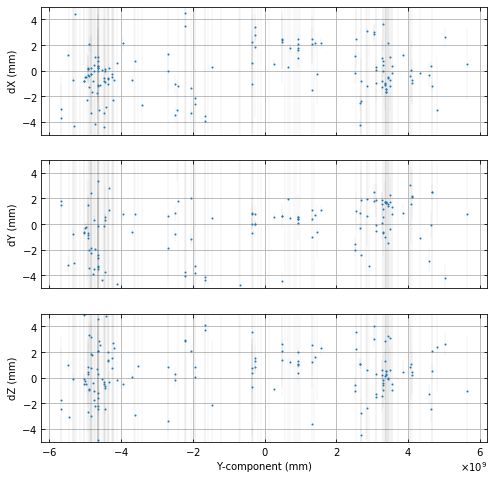

In [15]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)

ax0.errorbar(gtrfoft["yp"], gtrfoft["dxp"], fmt=".", ms=2,
             yerr=gtrfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(gtrfoft["yp"], gtrfoft["dyp"], fmt=".", ms=2,
             yerr=gtrfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(gtrfoft["yp"], gtrfoft["dzp"], fmt=".", ms=2,
             yerr=gtrfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Y-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

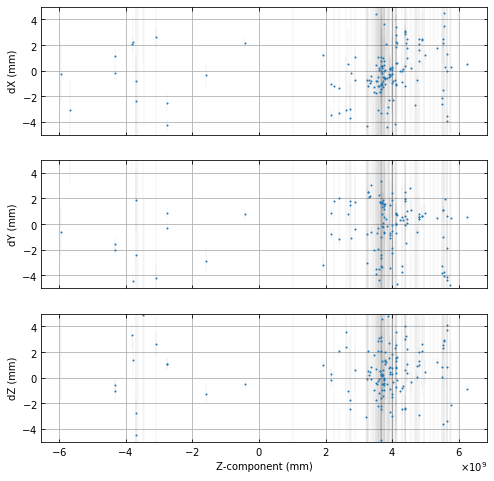

In [16]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)

ax0.errorbar(gtrfoft["zp"], gtrfoft["dxp"], fmt=".", ms=2,
             yerr=gtrfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(gtrfoft["zp"], gtrfoft["dyp"], fmt=".", ms=2,
             yerr=gtrfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(gtrfoft["zp"], gtrfoft["dzp"], fmt=".", ms=2,
             yerr=gtrfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Z-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

In [17]:
from my_progs.vlbi.helmert_trans import helmert_trans

dxp = np.array(gtrfoft["dxp"])
dyp = np.array(gtrfoft["dyp"])
dzp = np.array(gtrfoft["dzp"])
dxp_err = np.array(gtrfoft["dxp_err"])
dyp_err = np.array(gtrfoft["dyp_err"])
dzp_err = np.array(gtrfoft["dzp_err"])
xp = np.array(gtrfoft["xp"])
yp = np.array(gtrfoft["yp"])
zp = np.array(gtrfoft["zp"])
xy_cov = np.array(gtrfoft["dxp_dyp_cov"])
xz_cov = np.array(gtrfoft["dxp_dzp_cov"])
yz_cov = np.array(gtrfoft["dyp_dzp_cov"])

helmert_trans(dxp, dyp, dzp, dxp_err, dyp_err, dzp_err,
              xy_cov, xz_cov, yz_cov, xp, yp, zp)

#### Translation component (mm):
    +0.167 +/-    0.072 |   +0.258 +/-    0.075 |   -0.525 +/-    0.068 | =>    0.608 +/-    0.043
#### Scale factor (ppb）:
    0.181 +/-   0.014
#### Rotation component（mas）:
     +0.002 +/-    0.003 |    -0.003 +/-    0.002 |    +0.001 +/-    0.003 | =>   +0.004 +/-    0.000
##   correlation coefficients are:
 [[ 1.         -0.23257567  0.00490582 -0.02769848 -0.01038724  0.2098905
   0.65982189]
 [-0.23257567  1.          0.08073106  0.08356655  0.6817609  -0.04682602
  -0.30308374]
 [ 0.00490582  0.08073106  1.         -0.36048932  0.17082524  0.21074532
   0.00157662]
 [-0.02769848  0.08356655 -0.36048932  1.          0.04065923 -0.07674403
  -0.06331016]
 [-0.01038724  0.6817609   0.17082524  0.04065923  1.         -0.05450067
   0.02569397]
 [ 0.2098905  -0.04682602  0.21074532 -0.07674403 -0.05450067  1.
   0.12882078]
 [ 0.65982189 -0.30308374  0.00157662 -0.06331016  0.02569397  0.12882078
   1.        ]]


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


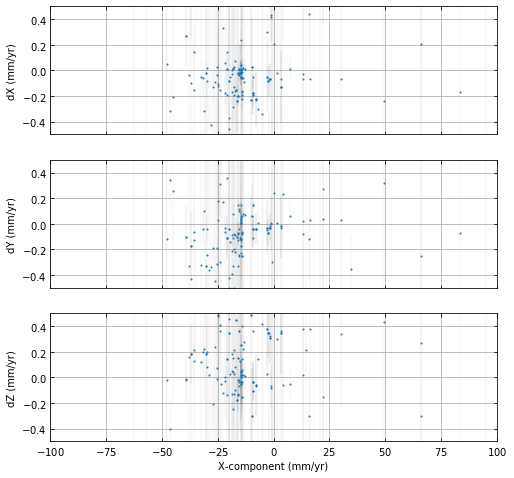

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)

ax0.errorbar(gtrfoft["xv"], gtrfoft["dxv"], fmt=".", ms=2,
             yerr=gtrfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(gtrfoft["xv"], gtrfoft["dyv"], fmt=".", ms=2,
             yerr=gtrfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(gtrfoft["xv"], gtrfoft["dzv"], fmt=".", ms=2,
             yerr=gtrfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("X-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

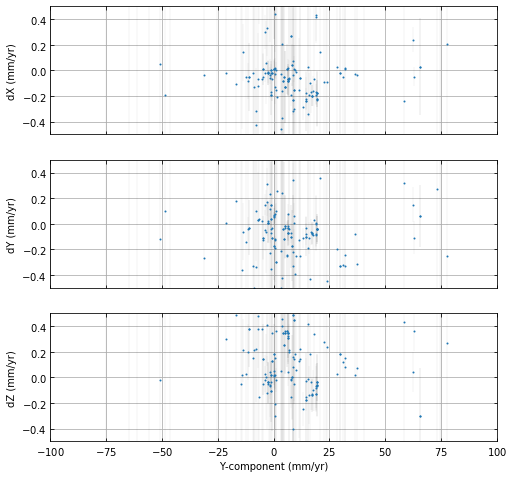

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)

ax0.errorbar(gtrfoft["yv"], gtrfoft["dxv"], fmt=".", ms=2,
             yerr=gtrfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(gtrfoft["yv"], gtrfoft["dyv"], fmt=".", ms=2,
             yerr=gtrfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(gtrfoft["yv"], gtrfoft["dzv"], fmt=".", ms=2,
             yerr=gtrfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Y-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

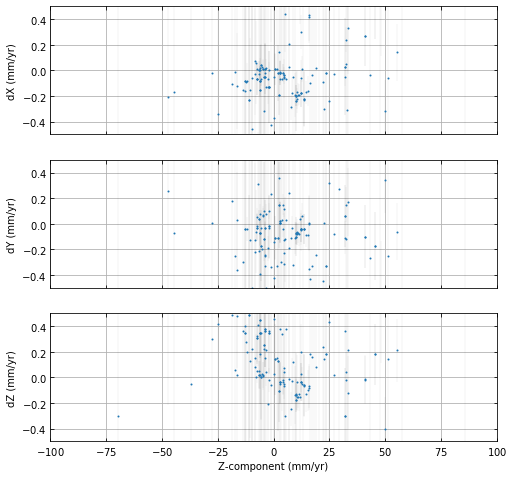

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)

ax0.errorbar(gtrfoft["zv"], gtrfoft["dxv"], fmt=".", ms=2,
             yerr=gtrfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(gtrfoft["zv"], gtrfoft["dyv"], fmt=".", ms=2,
             yerr=gtrfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(gtrfoft["zv"], gtrfoft["dzv"], fmt=".", ms=2,
             yerr=gtrfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Z-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

In [21]:
dxv = np.array(gtrfoft["dxv"])
dyv = np.array(gtrfoft["dyv"])
dzv = np.array(gtrfoft["dzv"])
dxv_err = np.array(gtrfoft["dxv_err"])
dyv_err = np.array(gtrfoft["dyv_err"])
dzv_err = np.array(gtrfoft["dzv_err"])
xy_cov = np.array(gtrfoft["dxv_dyv_cov"])
xz_cov = np.array(gtrfoft["dxv_dzv_cov"])
yz_cov = np.array(gtrfoft["dyv_dzv_cov"])

helmert_trans(dxv, dyv, dzv, dxv_err, dyv_err, dzv_err,
              xy_cov, xz_cov, yz_cov, xp, yp, zp, data_type="v")

#### Translation component (mm/yr):
    -0.010 +/-    0.015 |   -0.002 +/-    0.022 |   +0.040 +/-    0.018 | =>    0.041 +/-    0.001
#### Scale factor (ppb/yr）:
   -0.015 +/-   0.002
#### Rotation component（mas/yr）:
     +0.002 +/-    0.001 |    -0.000 +/-    0.001 |    +0.002 +/-    0.001 | =>   +0.003 +/-    0.000
##   correlation coefficients are:
 [[ 1.00000000e+00 -2.79173367e-02 -2.04207915e-02  4.02661400e-03
   2.56521987e-02 -4.34656562e-03  6.34611437e-01]
 [-2.79173367e-02  1.00000000e+00  3.57423672e-01  9.05419551e-03
   8.63232550e-01  2.91937174e-02  7.22124115e-03]
 [-2.04207915e-02  3.57423672e-01  1.00000000e+00 -8.19282101e-02
   4.50745017e-01  5.18141483e-02 -2.34392239e-02]
 [ 4.02661400e-03  9.05419551e-03 -8.19282101e-02  1.00000000e+00
   8.68079156e-03  9.55906634e-04  4.55159356e-03]
 [ 2.56521987e-02  8.63232550e-01  4.50745017e-01  8.68079156e-03
   1.00000000e+00 -1.13399213e-02  3.27985832e-02]
 [-4.34656562e-03  2.91937174e-02  5.18141483e-02  9.559066